<a href="https://colab.research.google.com/github/rj-pal/Percolation/blob/main/Percolation_comparison_tests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Percolation Test Results

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
# Check GPU connection
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Sat Jun 18 15:49:52 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 27.3 gigabytes of available RAM

You are using a high-RAM runtime!


In [1]:
import sys
sys.path.append('drive/MyDrive/modules')

In [4]:
# To meet the requirements of the Percolation Visualization Class- not used here

!pip install colorama

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from Percolation import *
import matplotlib.pyplot as plt

Test 1: Compares all four algorithms (Quick Find, Quick Union, Weighted Quick Union, and Weighted Quick Union with Path Compression) to look at the run times of 100 iterations from a 4 x 4 network to a 12 x 12 network. 

The test is for percolation and the percolation threshold is shown for each. A final average across all network sizes is also shown.


In [6]:
threshold_average = []
pc = 'PathCompression'
wqu = 'WeightedQuickUnion'
qu = 'QuickUnion'
qf = 'QuickFind'
pc_times = []
wqu_times = []
qu_times = []
qf_times = []
for i in range(11):
    size = (i + 2) ** 2
    mc = MonteCarlo(size, 100)
    print(f"Tests for network size: {size}")
    print("__________________________")
    pc_result = mc.monte_carlo_percolation_test(pc, randomized=False, seed_value=3)
    pc_times.append(pc_result[1])
    threshold_average.append(pc_result[0])
    print()
    wqu_result = mc.monte_carlo_percolation_test(wqu, randomized=False, seed_value=3)
    wqu_times.append(wqu_result[1])
    print()
    qu_result = mc.monte_carlo_percolation_test(qu, randomized=False, seed_value=3)
    qu_times.append(qu_result[1])
    print()
    qf_result = mc.monte_carlo_percolation_test(qf, randomized=False, seed_value=3)
    qf_times.append(qf_result[1])
    print()
print(f"The average threshold of percolation for 100 iterations across network sizes 4 to 12 is: {sum(threshold_average)/len(threshold_average)}")

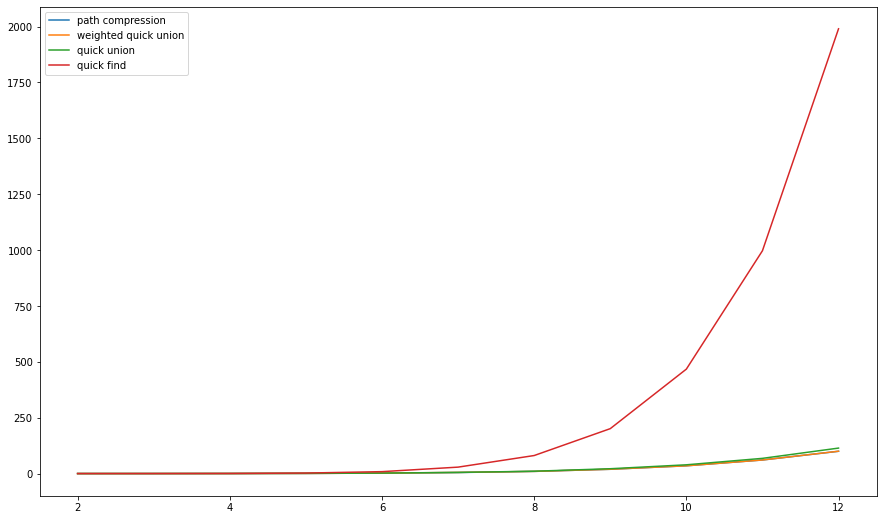

In [19]:
x = [x for x in range(2, 13, 1)]
y1 = pc_times
y2 = wqu_times
y3 = qu_times
y4 = qf_times
plt.figure(figsize=(15, 9)) 
plt.plot(x, y1, label = "path compression")
plt.plot(x, y2, label = "weighted quick union")
plt.plot(x, y3, label = "quick union")
plt.plot(x, y4, label = "quick find")
plt.legend()
plt.show()

In [20]:
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 27.3 gigabytes of available RAM

You are using a high-RAM runtime!


Test 2: Compares the Quick Union family to look at the run times of a fixed 100 x 100 network at various iterations: 100, 500, 1000, 2500, 5000.

The test is for full connection of the network and the times are shown.

In [21]:
pc = 'PathCompression'
wqu = 'WeightedQuickUnion'
qu = 'QuickUnion'
pc_times = []
wqu_times = []
qu_times = []
for i in [100, 500, 1000, 2500, 5000]:
    size = 100
    times = i
    mc = MonteCarlo(size, i)
    print(f"Size {size} x {size} at {i} iterations")
    print("---------------------------------------")
    print(f"Algorithm: {pc}")
    pc_times.append(mc.monte_carlo_full_connection_test(pc, seed_value=3, show_results=False)[1])
    print()
    print(f"Algorithm: {wqu}")
    wqu_times.append(mc.monte_carlo_full_connection_test(wqu, seed_value=3, show_results=False)[1])
    print()
    print(f"Algorithm: {qu}")
    qu_times.append(mc.monte_carlo_full_connection_test(qu, seed_value=3, show_results=False)[1])
    print()

Size 100 x 100 at 100 iterations
---------------------------------------
Algorithm: PathCompression
monte_carlo_full_connection_test: Elapsed time of 6.341034412384033 s

Algorithm: WeightedQuickUnion
monte_carlo_full_connection_test: Elapsed time of 6.041508674621582 s

Algorithm: QuickUnion
monte_carlo_full_connection_test: Elapsed time of 27.71798038482666 s

Size 100 x 100 at 500 iterations
---------------------------------------
Algorithm: PathCompression
monte_carlo_full_connection_test: Elapsed time of 31.781149864196777 s

Algorithm: WeightedQuickUnion
monte_carlo_full_connection_test: Elapsed time of 29.83543872833252 s

Algorithm: QuickUnion
monte_carlo_full_connection_test: Elapsed time of 139.72334575653076 s

Size 100 x 100 at 1000 iterations
---------------------------------------
Algorithm: PathCompression
monte_carlo_full_connection_test: Elapsed time of 63.35952186584473 s

Algorithm: WeightedQuickUnion
monte_carlo_full_connection_test: Elapsed time of 59.6325802803039

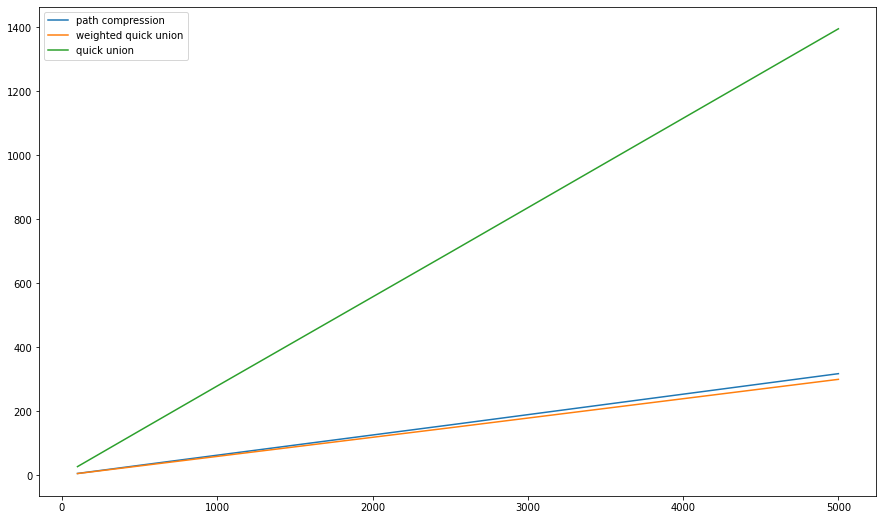

In [22]:
x = [100, 500, 1000, 2500, 5000]
y1 = pc_times
y2 = wqu_times
y3 = qu_times
plt.figure(figsize=(15, 9)) 
plt.plot(x, y1, label = "path compression")
plt.plot(x, y2, label = "weighted quick union")
plt.plot(x, y3, label = "quick union")
plt.legend()
plt.show()

In [23]:
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 27.3 gigabytes of available RAM

You are using a high-RAM runtime!


Test 3: Compares Path Compression and Weighted Quick Union to see if there really are performance benefits to Path Compression. The size of the network starts at 1000 and goes to 10000 with just one iteration of the full connection test.

In [24]:
pc = 'PathCompression'
wqu = 'WeightedQuickUnion'
pc_times = []
wqu_times = []
for size in range(1000, 10001, 500):
    mc = MonteCarlo(size, 1)
    print(f"Size {size} x {size} at one iteration")
    print("---------------------------------------")
    print(f"Algorithm: {pc}")
    pc_times.append(mc.monte_carlo_full_connection_test(pc, seed_value=3, show_results=False)[1])
    print()
    print(f"Algorithm: {wqu}")
    wqu_times.append(mc.monte_carlo_full_connection_test(wqu, seed_value=3, show_results=False)[1])
    print()

Size 1000 x 1000 at one iteration
---------------------------------------
Algorithm: PathCompression
monte_carlo_full_connection_test: Elapsed time of 7.748592853546143 s

Algorithm: WeightedQuickUnion
monte_carlo_full_connection_test: Elapsed time of 7.579691410064697 s

Size 1500 x 1500 at one iteration
---------------------------------------
Algorithm: PathCompression
monte_carlo_full_connection_test: Elapsed time of 17.930012702941895 s

Algorithm: WeightedQuickUnion
monte_carlo_full_connection_test: Elapsed time of 17.46544623374939 s

Size 2000 x 2000 at one iteration
---------------------------------------
Algorithm: PathCompression
monte_carlo_full_connection_test: Elapsed time of 32.17445206642151 s

Algorithm: WeightedQuickUnion
monte_carlo_full_connection_test: Elapsed time of 31.95862889289856 s

Size 2500 x 2500 at one iteration
---------------------------------------
Algorithm: PathCompression
monte_carlo_full_connection_test: Elapsed time of 50.80096411705017 s

Algorith

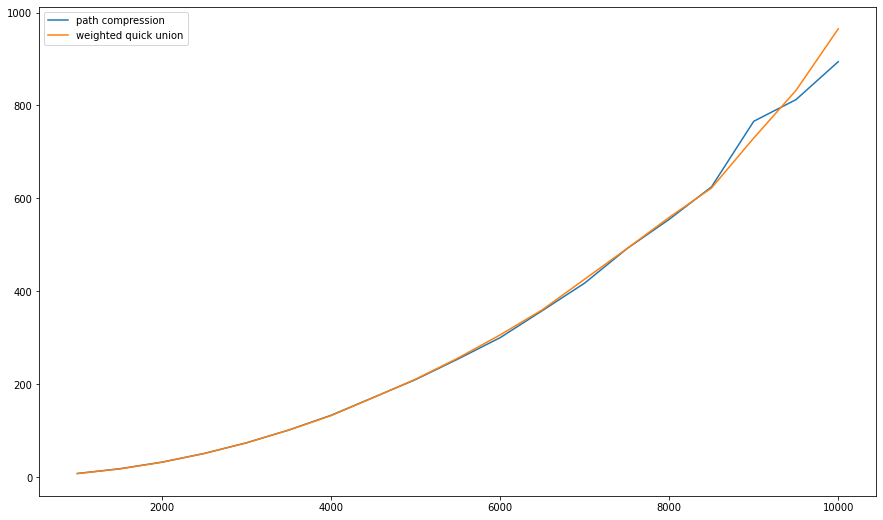

In [25]:
x = [x for x in range(1000, 10001, 500)]
y1 = pc_times
y2 = wqu_times
plt.figure(figsize=(15, 9)) 
plt.plot(x, y1, label = "path compression")
plt.plot(x, y2, label = "weighted quick union")
plt.legend()

plt.show()

In [3]:
pc = 'PathCompression'
wqu = 'WeightedQuickUnion'
mc = MonteCarlo(15000, 1)
print(f"Algorithm: {pc}")
mc.monte_carlo_full_connection_test(pc, seed_value=3, show_results=True)
print()
print(f"Algorithm: {wqu}")
mc.monte_carlo_full_connection_test(wqu, seed_value=3, show_results=True)
print()

Algorithm: PathCompression
Board Size: 15000 x 15000
Iterations: 1
Algorithm: PathCompression
monte_carlo_full_connection_test: Elapsed time of 2149.26775097847 s

Algorithm: WeightedQuickUnion
Board Size: 15000 x 15000
Iterations: 1
Algorithm: WeightedQuickUnion
monte_carlo_full_connection_test: Elapsed time of 2124.195415019989 s

